In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
def percentage_MV(df):
    columns= list(df.columns)
    d = {}
    for x in columns:
        d[x]= df[x].isnull().sum()/len(df[x])
    
    missing_values = pd.DataFrame(d, index=['percentage of missing values'])
    return missing_values.transpose()

In [3]:
data = pd.read_csv(r"/Users/edgartome_1/IronHack/IronProjects/Project5/dataset.csv")
survival = pd.DataFrame(data)
survival

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [4]:
survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [5]:
survival.shape

(91713, 85)

In [6]:
survival.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [7]:
survival.isnull().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [8]:
list_wanted_columns = ['patient_id', 'hospital_id', 'age', 'ethnicity', 'gender', 'height','icu_admit_source','weight','aids','cirrhosis', 'diabetes_mellitus','hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma','solid_tumor_with_metastasis','hospital_death','d1_heartrate_max', 'd1_heartrate_min','d1_glucose_max', 'd1_glucose_min']
columns = list(survival.columns)
unwanted = [x for x in columns if x not in list_wanted_columns]
for x in unwanted:
    del survival[f'{x}']

In [9]:
survival

,patient_id,hospital_id,age,ethnicity,gender,height,icu_admit_source,weight,d1_heartrate_max,d1_heartrate_min,...,d1_glucose_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,25312,118,68.0,Caucasian,M,180.3,Floor,73.9,119.0,72.0,...,109.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,59342,81,77.0,Caucasian,F,160.0,Floor,70.2,118.0,72.0,...,128.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,50777,118,25.0,Caucasian,F,172.7,Accident & Emergency,95.3,96.0,68.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46918,118,81.0,Caucasian,F,165.1,Operating Room / Recovery,61.7,116.0,92.0,...,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,34377,33,19.0,Caucasian,M,188.0,Accident & Emergency,NaN,89.0,60.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,78108,30,75.0,Caucasian,M,177.8,Floor,72.9,115.0,70.0,...,187.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
91709,13486,121,56.0,Caucasian,F,183.0,Floor,158.0,100.0,76.0,...,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91710,58179,195,48.0,Caucasian,M,170.2,Accident & Emergency,78.9,158.0,79.0,...,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
91711,120598,66,NaN,Caucasian,F,154.9,Accident & Emergency,55.9,82.0,60.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
survival.isnull().sum()/len(survival)

patient_id                     0.000000
hospital_id                    0.000000
age                            0.046100
ethnicity                      0.015210
gender                         0.000273
height                         0.014545
icu_admit_source               0.001221
weight                         0.029658
d1_heartrate_max               0.001581
d1_heartrate_min               0.001581
d1_glucose_max                 0.063317
d1_glucose_min                 0.063317
aids                           0.007796
cirrhosis                      0.007796
diabetes_mellitus              0.007796
hepatic_failure                0.007796
immunosuppression              0.007796
leukemia                       0.007796
lymphoma                       0.007796
solid_tumor_with_metastasis    0.007796
hospital_death                 0.000000
dtype: float64

In [11]:
columns = list(survival.columns)
for x in survival.columns:
    survival.drop(survival[survival[x].isnull()].index, inplace = True)

In [12]:
survival.isnull().sum()/len(survival)

patient_id                     0.0
hospital_id                    0.0
age                            0.0
ethnicity                      0.0
gender                         0.0
height                         0.0
icu_admit_source               0.0
weight                         0.0
d1_heartrate_max               0.0
d1_heartrate_min               0.0
d1_glucose_max                 0.0
d1_glucose_min                 0.0
aids                           0.0
cirrhosis                      0.0
diabetes_mellitus              0.0
hepatic_failure                0.0
immunosuppression              0.0
leukemia                       0.0
lymphoma                       0.0
solid_tumor_with_metastasis    0.0
hospital_death                 0.0
dtype: float64

In [13]:
list_wanted_columns

['patient_id',
 'hospital_id',
 'age',
 'ethnicity',
 'gender',
 'height',
 'icu_admit_source',
 'weight',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'hospital_death',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_glucose_max',
 'd1_glucose_min']

# analysis


## Ferdi
height

## Mathieu
age

## Edgar
weight




In [14]:
survival.to_csv(r'/Users/edgartome_1/IronHack/IronProjects/Project5/clean_survival_data.csv')

In [15]:
survival.columns

Index(['patient_id', 'hospital_id', 'age', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'weight', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_glucose_max', 'd1_glucose_min', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death'],
      dtype='object')

In [16]:
conditions = [
    survival['age']<20,
    ((survival['age']>=20)&(survival['age']<30)),
    ((survival['age']>=30)&(survival['age']<40)),
    ((survival['age']>=40)&(survival['age']<50)),
    ((survival['age']>=50)&(survival['age']<60)),
    ((survival['age']>=60)&(survival['age']<70)),
    ((survival['age']>=70)&(survival['age']<80)),
    ((survival['age']>=80)&(survival['age']<90))
]

choices = ['10-20',
           '20-30',
          '30-40',
          '40-50',
          '50-60',
          '60-70',
          '70-80',
          '80-90']

survival['age_bins'] = np.select(conditions, choices, 'huge')

In [17]:
survival

,patient_id,hospital_id,age,ethnicity,gender,height,icu_admit_source,weight,d1_heartrate_max,d1_heartrate_min,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,age_bins
0,25312,118,68.0,Caucasian,M,180.3,Floor,73.9,119.0,72.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,60-70
1,59342,81,77.0,Caucasian,F,160.0,Floor,70.2,118.0,72.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,70-80
3,46918,118,81.0,Caucasian,F,165.1,Operating Room / Recovery,61.7,116.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80-90
5,74489,83,67.0,Caucasian,M,190.5,Accident & Emergency,100.0,113.0,83.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,60-70
6,49526,83,59.0,Caucasian,F,165.1,Accident & Emergency,156.6,112.0,70.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,59223,121,54.0,Native American,M,177.8,Accident & Emergency,62.5,78.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,50-60
91708,78108,30,75.0,Caucasian,M,177.8,Floor,72.9,115.0,70.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,70-80
91709,13486,121,56.0,Caucasian,F,183.0,Floor,158.0,100.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,50-60
91710,58179,195,48.0,Caucasian,M,170.2,Accident & Emergency,78.9,158.0,79.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,40-50


In [18]:
chartone = survival[['hepatic_failure','age_bins','patient_id']]

In [19]:
an = chartone.pivot_table(index=['hepatic_failure'], values=['patient_id'], columns=['age_bins'], aggfunc='count')
an.reset_index(inplace=True)
#vehicles.pivot_table(index=["Vehicle Class"], columns=["Cylinders"], values=["Combined MPG"], fill_value=0)

In [20]:
x = an.loc[an['hepatic_failure']==1]
dataforchart = x.transpose()

In [21]:
dataforchart.reset_index(inplace=True)

In [22]:
dataforchart

,level_0,age_bins,1
0,hepatic_failure,,1.0
1,patient_id,10-20,1.0
2,patient_id,20-30,9.0
3,patient_id,30-40,63.0
4,patient_id,40-50,149.0
5,patient_id,50-60,335.0
6,patient_id,60-70,303.0
7,patient_id,70-80,146.0
8,patient_id,80-90,84.0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

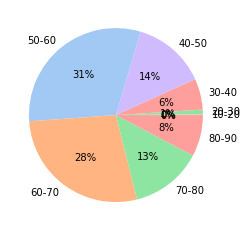

In [24]:
#define data
data = list(dataforchart[1])
labels = list(dataforchart['age_bins'])

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

##### My code

<AxesSubplot:ylabel='Frequency'>

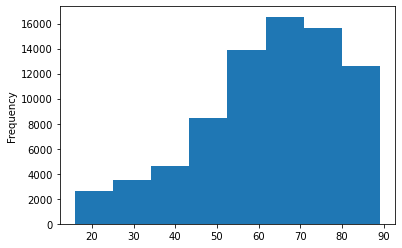

In [25]:
survival['age'].plot.hist(bins=8)

In [26]:
table1 = pd.crosstab(survival['ethnicity'], survival['hospital_death'])
table1

hospital_death,0,1
ethnicity,,
African American,7728,637
Asian,924,81
Caucasian,55480,5101
Hispanic,2930,304
Native American,666,65
Other/Unknown,3647,305


In [27]:
table1['ratio'] = table1[1]/table1[0]
table1

hospital_death,0,1,ratio
ethnicity,,,
African American,7728,637,0.082428
Asian,924,81,0.087662
Caucasian,55480,5101,0.091943
Hispanic,2930,304,0.103754
Native American,666,65,0.097598
Other/Unknown,3647,305,0.083630


In [28]:
# creating pivot table
table2 = pd.pivot_table(survival, index=['ethnicity', 'hospital_death'])

table2

age      aids  cirrhosis  \
ethnicity        hospital_death                                   
African American 0               56.409550  0.003235   0.007893   
                 1               63.624804  0.003140   0.020408   
Asian            0               61.266234  0.000000   0.015152   
                 1               66.925926  0.000000   0.049383   
Caucasian        0               63.321179  0.000541   0.014510   
                 1               69.189571  0.001372   0.033719   
Hispanic         0               61.228669  0.000683   0.026962   
                 1               69.687500  0.003289   0.046053   
Native American  0               51.025526  0.001502   0.066066   
                 1               57.169231  0.000000   0.292308   
Other/Unknown    0               57.828626  0.001645   0.024952   
                 1               65.183607  0.000000   0.022951   

                                 d1_glucose_max  d1_glucose_min  \
ethnicity        hospital_death                                   
African American 0                   178.891563      112.673913   
                 1                   194.657771      110.967033   
Asian            0                   174.891775      114.862554   
                 1                   206.901235      117.506173   
Caucasian        0                   171.529903      114.359553   
                 1                   198.778475      118.450304   
Hispanic         0                   179.023208      113.372355   
                 1                   213.506579      120.756579   
Native American  0                   183.711712      109.869369   
                 1                   198.184615       97.138462   
Other/Unknown    0                   182.910886      113.991500   
                 1                   206.068852      120.872131   

                                 d1_heartrate_max  d1_heartrate_min  \
ethnicity        hospital_death                                       
African American 0                     103.719462         72.721791   
                 1                     115.731554         70.675039   
Asian            0                     101.954545         71.060606   
                 1                     119.925926         69.296296   
Caucasian        0                     102.496810         70.179506   
                 1                     115.141933         70.438934   
Hispanic         0                     102.158703         70.502389   
                 1                     114.825658         74.154605   
Native American  0                     105.307808         73.444444   
                 1                     114.923077         70.600000   
Other/Unknown    0                     100.074033         72.585961   
                 1                     115.514754         74.540984   

                                 diabetes_mellitus      height  \
ethnicity        hospital_death                                  
African American 0                        0.277174  170.837284   
                 1                        0.221350  170.786327   
Asian            0                        0.278139  162.122749   
                 1                        0.185185  164.089383   
Caucasian        0                        0.231957  170.285715   
                 1                        0.208194  169.497014   
Hispanic         0                        0.263140  166.053526   
                 1                        0.220395  165.754934   
Native American  0                        0.345345  168.540345   
                 1                        0.415385  168.042769   
Other/Unknown    0                        0.291198  166.688618   
                 1                        0.291803  167.047803   

                                 hepatic_failure  hospital_id  \
ethnicity        hospital_death                                 
African American 0                      0.007893   101.188535   
                 1                      0.0125

In [29]:
table3 = pd.crosstab(survival['gender'], survival['hospital_death'])
table3

hospital_death,0,1
gender,,
F,32297,2984
M,39078,3509


In [30]:
survival.describe()

,patient_id,hospital_id,age,height,weight,d1_heartrate_max,d1_heartrate_min,d1_glucose_max,d1_glucose_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000,77868.000000
mean,65528.630066,105.781322,62.587379,169.814684,84.770181,103.573817,70.648135,175.551998,114.385049,0.000950,0.016990,0.240561,0.013998,0.027521,0.007371,0.004328,0.021447,0.083385
std,37748.567522,63.695251,16.589813,10.740621,25.102918,21.946879,16.938734,87.281422,38.320421,0.030813,0.129236,0.427427,0.117483,0.163597,0.085541,0.065644,0.144868,0.276465
min,1.000000,2.000000,16.000000,137.200000,38.600000,58.000000,0.000000,73.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32951.250000,47.000000,53.000000,162.600000,67.600000,88.000000,60.000000,118.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65330.500000,112.000000,65.000000,170.100000,81.200000,101.000000,70.000000,151.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98238.250000,166.000000,75.000000,177.800000,97.900000,117.000000,81.000000,202.000000,131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,204.000000,89.000000,195.590000,186.000000,177.000000,160.000000,611.000000,288.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
survival.corr()

,patient_id,hospital_id,age,height,weight,d1_heartrate_max,d1_heartrate_min,d1_glucose_max,d1_glucose_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
patient_id,1.000000,-0.004589,0.003576,0.005050,0.000817,0.002802,0.004020,-0.003782,0.002021,-0.001734,0.003256,-0.000275,-0.002329,0.001823,0.000415,0.003898,-0.003090,0.005417
hospital_id,-0.004589,1.000000,-0.006226,0.030038,0.026118,-0.010262,-0.005258,-0.002270,0.018863,-0.005319,0.003207,0.012996,0.002575,-0.000866,-0.003855,0.002336,-0.007316,-0.002011
age,0.003576,-0.006226,1.000000,-0.113113,-0.126556,-0.146805,-0.150140,0.010718,0.064858,-0.030260,-0.030885,0.069833,-0.022662,0.022459,0.028478,0.022902,0.024415,0.104409
height,0.005050,0.030038,-0.113113,1.000000,0.382380,-0.016707,-0.029269,-0.013800,0.017165,0.009913,0.010292,-0.004039,0.007314,-0.001761,0.002417,0.010343,0.002963,-0.015823
weight,0.000817,0.026118,-0.126556,0.382380,1.000000,-0.040591,-0.001613,0.085640,0.136921,-0.018304,-0.002051,0.158940,0.000032,-0.034716,-0.013324,-0.004980,-0.042810,-0.030374
d1_heartrate_max,0.002802,-0.010262,-0.146805,-0.016707,-0.040591,1.000000,0.474521,0.110061,0.052762,0.009923,0.013225,-0.031553,0.016170,0.063490,0.023461,0.019973,0.044774,0.160602
d1_heartrate_min,0.004020,-0.005258,-0.150140,-0.029269,-0.001613,0.474521,1.000000,0.099741,0.057716,0.013411,0.019985,0.017293,0.021184,0.049834,0.011043,0.012954,0.040861,0.002991
d1_glucose_max,-0.003782,-0.002270,0.010718,-0.013800,0.085640,0.110061,0.099741,1.000000,0.382744,-0.011942,-0.004936,0.413770,-0.009527,-0.007510,-0.005535,-0.002941,-0.015362,0.082762
d1_glucose_min,0.002021,0.018863,0.064858,0.017165,0.136921,0.052762,0.057716,0.382744,1.000000,-0.008271,-0.016515,0.141764,-0.018330,0.004257,-0.005042,0.000267,0.011557,0.026192
aids,-0.001734,-0.005319,-0.030260,0.009913,-0.018304,0.009923,0.013411,-0.011942,-0.008271,1.000000,0.008845,-0.011508,0.003420,0.025383,-0.002658,0.017014,-0.001689,0.005773


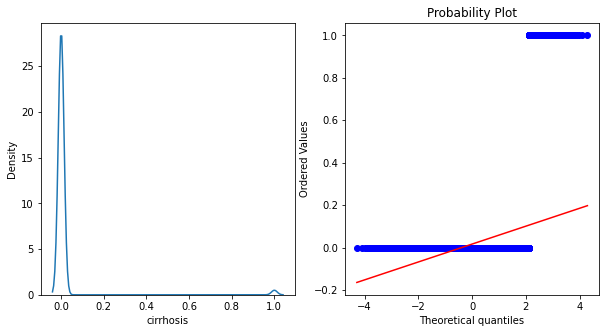

7.47506384861428

In [32]:
#Adjust Data Distribution

import scipy.stats as stats
import pylab


def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

normality(survival,'cirrhosis')

survival['cirrhosis'].skew()

/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


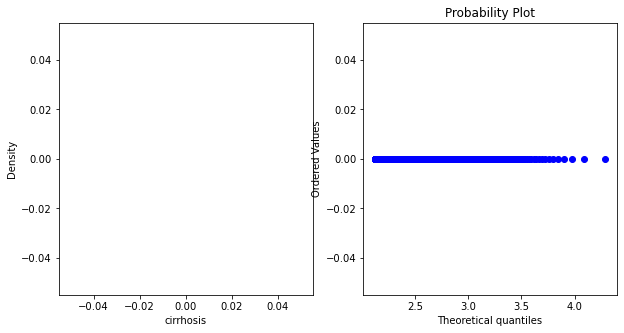

nan

In [33]:
#Log transformation, performing logarithmic transformation on the feature

survival['cirrhosis']=np.log(survival['cirrhosis'])


normality(survival,'cirrhosis')

survival['cirrhosis'].skew()

In [34]:
survival['heart']=survival['d1_heartrate_max'] + survival['d1_heartrate_min']

survival['glucose']=survival['d1_glucose_max'] + survival['d1_glucose_min']

survival

,patient_id,hospital_id,age,ethnicity,gender,height,icu_admit_source,weight,d1_heartrate_max,d1_heartrate_min,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,age_bins,heart,glucose
0,25312,118,68.0,Caucasian,M,180.3,Floor,73.9,119.0,72.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,60-70,191.0,277.0
1,59342,81,77.0,Caucasian,F,160.0,Floor,70.2,118.0,72.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,70-80,190.0,273.0
3,46918,118,81.0,Caucasian,F,165.1,Operating Room / Recovery,61.7,116.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,80-90,208.0,273.0
5,74489,83,67.0,Caucasian,M,190.5,Accident & Emergency,100.0,113.0,83.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,60-70,196.0,281.0
6,49526,83,59.0,Caucasian,F,165.1,Accident & Emergency,156.6,112.0,70.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,50-60,182.0,326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,59223,121,54.0,Native American,M,177.8,Accident & Emergency,62.5,78.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,50-60,133.0,182.0
91708,78108,30,75.0,Caucasian,M,177.8,Floor,72.9,115.0,70.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,70-80,185.0,587.0
91709,13486,121,56.0,Caucasian,F,183.0,Floor,158.0,100.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,50-60,176.0,354.0
91710,58179,195,48.0,Caucasian,M,170.2,Accident & Emergency,78.9,158.0,79.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,40-50,237.0,624.0


In [35]:
survival['heart'].corr(survival['hospital_death'])

0.10676842075288916

In [36]:
survival[['heart','diabetes_mellitus','cirrhosis','hepatic_failure', 'hospital_death']].corr()

,heart,diabetes_mellitus,cirrhosis,hepatic_failure,hospital_death
heart,1.000000,-0.011932,NaN,0.021313,0.106768
diabetes_mellitus,-0.011932,1.000000,NaN,0.007107,-0.017493
cirrhosis,NaN,NaN,NaN,NaN,NaN
hepatic_failure,0.021313,0.007107,NaN,1.000000,0.042746
hospital_death,0.106768,-0.017493,NaN,0.042746,1.000000


In [37]:
print(survival['cirrhosis'])

0       -inf
1       -inf
3       -inf
5       -inf
6       -inf
        ... 
91706   -inf
91708   -inf
91709   -inf
91710   -inf
91712   -inf
Name: cirrhosis, Length: 77868, dtype: float64


In [38]:
choices = ['10-20',
           '20-30',
          '30-40',
          '40-50',
          '50-60',
          '60-70',
          '70-80',
          '80-90']
survival['age_bins'] = np.select(conditions, choices, 'huge')

conditions2 = [
    survival['height']<140,
    ((survival['height']>=140)&(survival['height']<150)),
    ((survival['height']>=150)&(survival['height']<160)),
    ((survival['height']>=160)&(survival['height']<170)),
    ((survival['height']>=170)&(survival['height']<180)),
    ((survival['height']>=180)&(survival['height']<190)),
    ((survival['height']>=190)&(survival['height']<200))
]
choices2 = ['130-140',
           '140-150',
           '150-160',
           '160-170',
           '170-180',
           '180-190',
           '190-200']
survival['height_bins'] = np.select(conditions2, choices2, 'huge')

conditions3 = [
    survival['weight']<50,
    ((survival['weight']>=50)&(survival['weight']<70)),
    ((survival['weight']>=70)&(survival['weight']<90)),
    ((survival['weight']>=90)&(survival['weight']<110)),
    ((survival['weight']>=110)&(survival['weight']<130)),
    ((survival['weight']>=130)&(survival['weight']<150)),
    ((survival['weight']>=150)&(survival['weight']<170)),
    ((survival['weight']>=170)&(survival['weight']<190))
]
choices3 = ['30-50',
            '50-70',
            '70-90',
            '90-110',
            '110-130',
            '130-150',
            '150-170',
            '170-190']
survival['weight_bins'] = np.select(conditions3, choices3, 'huge')

In [39]:
survival

,patient_id,hospital_id,age,ethnicity,gender,height,icu_admit_source,weight,d1_heartrate_max,d1_heartrate_min,...,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,age_bins,heart,glucose,height_bins,weight_bins
0,25312,118,68.0,Caucasian,M,180.3,Floor,73.9,119.0,72.0,...,0.0,0.0,0.0,0.0,0,60-70,191.0,277.0,180-190,70-90
1,59342,81,77.0,Caucasian,F,160.0,Floor,70.2,118.0,72.0,...,0.0,0.0,0.0,0.0,0,70-80,190.0,273.0,160-170,70-90
3,46918,118,81.0,Caucasian,F,165.1,Operating Room / Recovery,61.7,116.0,92.0,...,0.0,0.0,0.0,0.0,0,80-90,208.0,273.0,160-170,50-70
5,74489,83,67.0,Caucasian,M,190.5,Accident & Emergency,100.0,113.0,83.0,...,0.0,0.0,0.0,0.0,0,60-70,196.0,281.0,190-200,90-110
6,49526,83,59.0,Caucasian,F,165.1,Accident & Emergency,156.6,112.0,70.0,...,0.0,0.0,0.0,0.0,0,50-60,182.0,326.0,160-170,150-170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,59223,121,54.0,Native American,M,177.8,Accident & Emergency,62.5,78.0,55.0,...,0.0,0.0,0.0,0.0,0,50-60,133.0,182.0,170-180,50-70
91708,78108,30,75.0,Caucasian,M,177.8,Floor,72.9,115.0,70.0,...,0.0,0.0,0.0,1.0,0,70-80,185.0,587.0,170-180,70-90
91709,13486,121,56.0,Caucasian,F,183.0,Floor,158.0,100.0,76.0,...,0.0,0.0,0.0,0.0,0,50-60,176.0,354.0,180-190,150-170
91710,58179,195,48.0,Caucasian,M,170.2,Accident & Emergency,78.9,158.0,79.0,...,0.0,0.0,0.0,0.0,0,40-50,237.0,624.0,170-180,70-90


In [40]:
survival['hospital_death'][survival['hospital_death']== 1].count()

6493

In [41]:
survival['hospital_death'][survival['hospital_death']== 0].count()

71375

In [42]:
survival['hospital_death'].count()

77868

In [43]:
table5 = pd.crosstab(survival['hospital_death'], survival['hospital_death'])
table5

hospital_death,0,1
hospital_death,,
0,71375,0
1,0,6493


In [44]:
survival.columns

Index(['patient_id', 'hospital_id', 'age', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'weight', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_glucose_max', 'd1_glucose_min', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death', 'age_bins',
       'heart', 'glucose', 'height_bins', 'weight_bins'],
      dtype='object')

In [45]:
survival.groupby('gender')['d1_heartrate_max','d1_heartrate_min', 'd1_glucose_max', 'd1_glucose_min'].agg(['mean', 'max', 'min'])

/var/folders/bk/pxkcy9j94652x3trpppgb63m0000gp/T/ipykernel_53545/2731721331.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  survival.groupby('gender')['d1_heartrate_max','d1_heartrate_min', 'd1_glucose_max', 'd1_glucose_min'].agg(['mean', 'max', 'min'])


d1_heartrate_max              d1_heartrate_min              \
                   mean    max   min             mean    max  min   
gender                                                              
F            104.434682  177.0  58.0        71.536748  152.0  0.0   
M            102.860638  177.0  58.0        69.911968  160.0  0.0   

       d1_glucose_max              d1_glucose_min               
                 mean    max   min           mean    max   min  
gender                                                          
F          176.695700  611.0  73.0     114.200108  288.0  33.0  
M          174.604504  611.0  73.0     114.538263  288.0  33.0

In [46]:
survival.groupby('gender')['d1_heartrate_max','d1_heartrate_min', 'd1_glucose_max', 'd1_glucose_min'].agg(['mean', 'max', 'min'])

/var/folders/bk/pxkcy9j94652x3trpppgb63m0000gp/T/ipykernel_53545/2731721331.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  survival.groupby('gender')['d1_heartrate_max','d1_heartrate_min', 'd1_glucose_max', 'd1_glucose_min'].agg(['mean', 'max', 'min'])


d1_heartrate_max              d1_heartrate_min              \
                   mean    max   min             mean    max  min   
gender                                                              
F            104.434682  177.0  58.0        71.536748  152.0  0.0   
M            102.860638  177.0  58.0        69.911968  160.0  0.0   

       d1_glucose_max              d1_glucose_min               
                 mean    max   min           mean    max   min  
gender                                                          
F          176.695700  611.0  73.0     114.200108  288.0  33.0  
M          174.604504  611.0  73.0     114.538263  288.0  33.0

In [47]:
table5 = pd.crosstab(survival['hospital_death'], survival['cirrhosis'])
table5

cirrhosis,-inf,0.0
hospital_death,,
0,70281,1094
1,6264,229


In [48]:
table6 = pd.crosstab(survival['hospital_death'], survival['aids'])
table6

aids,0.0,1.0
hospital_death,,
0,71311,64
1,6483,10


In [49]:
table6 = pd.crosstab(survival['hospital_death'], survival['diabetes_mellitus'])
table6

diabetes_mellitus,0.0,1.0
hospital_death,,
0,54044,17331
1,5092,1401


In [50]:
table6 = pd.crosstab(survival['hospital_death'], survival['hepatic_failure'])
table6

hepatic_failure,0.0,1.0
hospital_death,,
0,70484,891
1,6294,199


In [51]:
table6 = pd.crosstab(survival['hospital_death'], survival['immunosuppression'])
table6

immunosuppression,0.0,1.0
hospital_death,,
0,69578,1797
1,6147,346


In [52]:
table6 = pd.crosstab(survival['hospital_death'], survival['leukemia'])
table6

leukemia,0.0,1.0
hospital_death,,
0,70909,466
1,6385,108


In [53]:
table6 = pd.crosstab(survival['hospital_death'], survival['lymphoma'])
table6

lymphoma,0.0,1.0
hospital_death,,
0,71095,280
1,6436,57


In [54]:
table6 = pd.crosstab(survival['hospital_death'], survival['solid_tumor_with_metastasis'])
table6

solid_tumor_with_metastasis,0.0,1.0
hospital_death,,
0,70008,1367
1,6190,303


<AxesSubplot:xlabel='age', ylabel='glucose'>

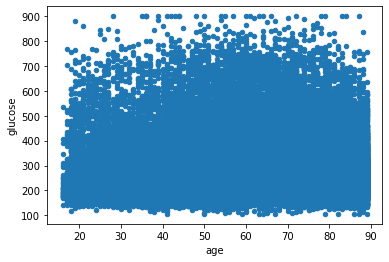

In [55]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib as plt
import seaborn as sns
# Your code here.
survival.plot.scatter(x='age', y='glucose')